In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
from sklearn.datasets import load_iris

In [53]:
iris = load_iris()
print(iris["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [54]:
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
df["target"] = iris["target"]
df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  
1         0  
2         0  
3         0  
4         0  
..      ...  
145       2  
146       2  
147       2  
148       2  
149       2  

[150 rows x 5 columns]

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [56]:
df.nunique()

sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
target                3
dtype: int64

In [57]:
df["target"].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

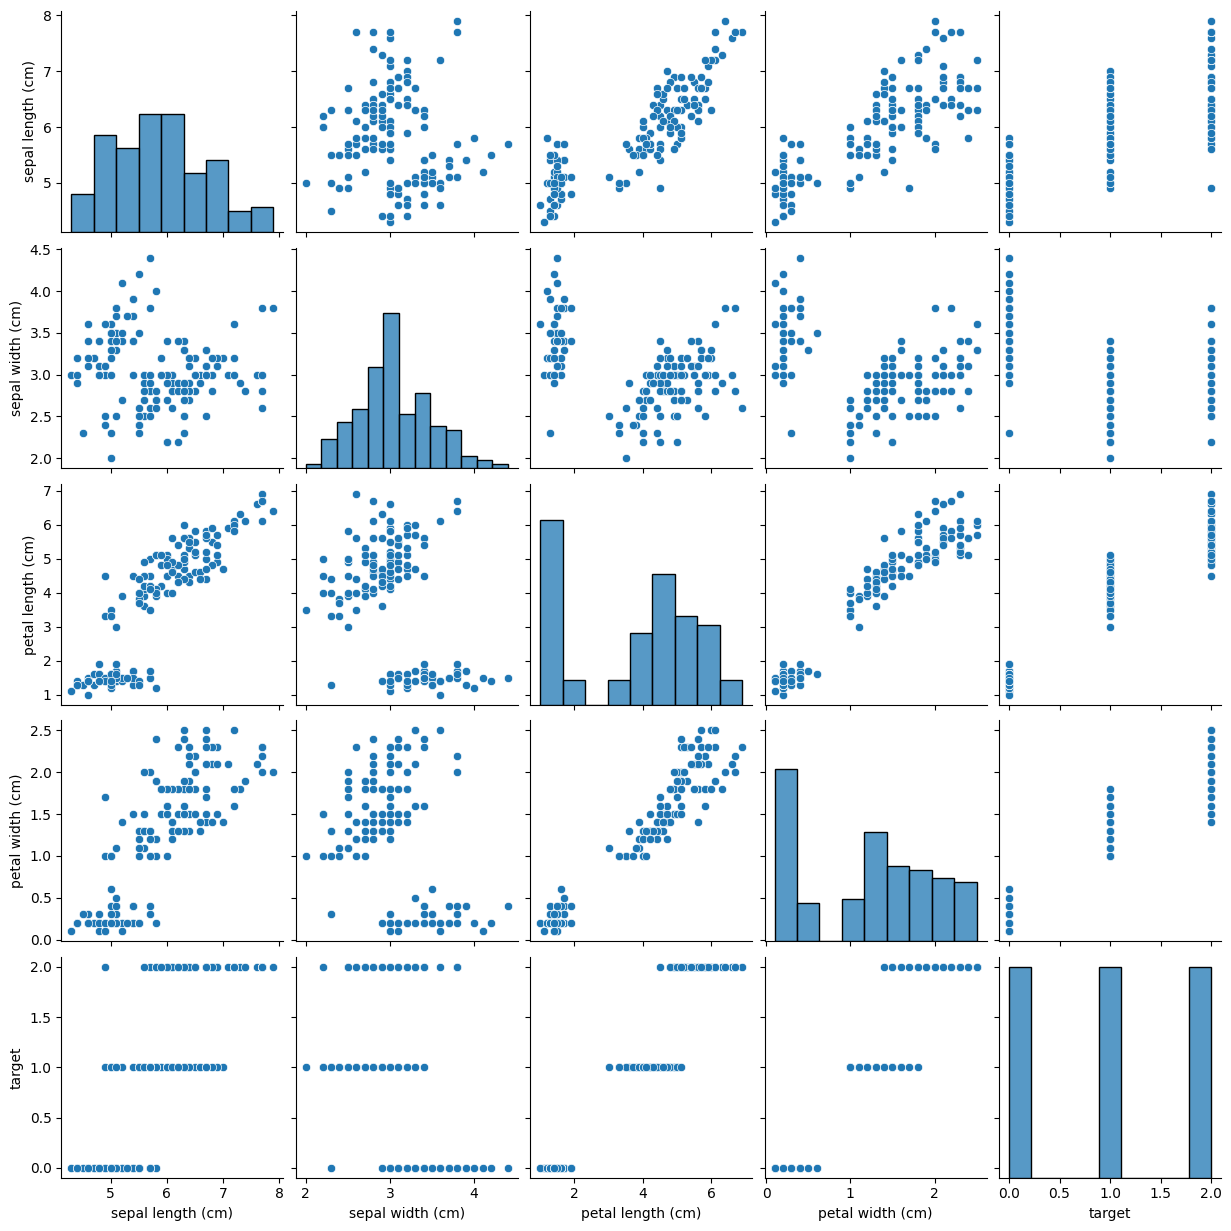

In [58]:
sns.pairplot(df)

In [59]:
df.corr()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
target                      0.782561         -0.426658           0.949035   

                   petal width (cm)    target  
sepal length (cm)          0.817941  0.782561  
sepal width (cm)          -0.366126 -0.426658  
petal length (cm)          0.962865  0.949035  
petal width (cm)           1.000000  0.956547  
target                     0.956547  1.000000

In [60]:
X = df.drop("target", axis=1)
y = df["target"]
X.shape, y.shape

((150, 4), (150,))

In [61]:
def correlation (dataset, threshold):
    col_corr= set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
              colname = corr_matrix.columns [i]
              col_corr.add(colname)

    return col_corr

In [62]:
correlation(X, 0.9)

{'petal width (cm)'}

In [63]:
X = X.drop(correlation(X, 0.9), axis = 1)

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 3), (30, 3), (120,), (30,))

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(max_depth = 3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
accuracy_score(y_test, y_pred)

0.9666666666666667

In [66]:
model_entropy = DecisionTreeClassifier(max_depth =2, criterion="entropy")
model_entropy.fit(X_train, y_train)
y_pred = model_entropy.predict(X_test)
y_pred_train = model_entropy.predict(X_train)
accuracy_score(y_test, y_pred)

0.9666666666666667

In [67]:
accuracy_score(y_train, y_pred_train)

0.95

[Text(0.375, 0.875, 'x[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'x[0] <= 4.95\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.125, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(0.75, 0.375, 'x[2] <= 5.05\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.625, 0.125, 'gini = 0.463\nsamples = 11\nvalue = [0, 4, 7]'),
 Text(0.875, 0.125, 'gini = 0.061\nsamples = 32\nvalue = [0, 1, 31]')]

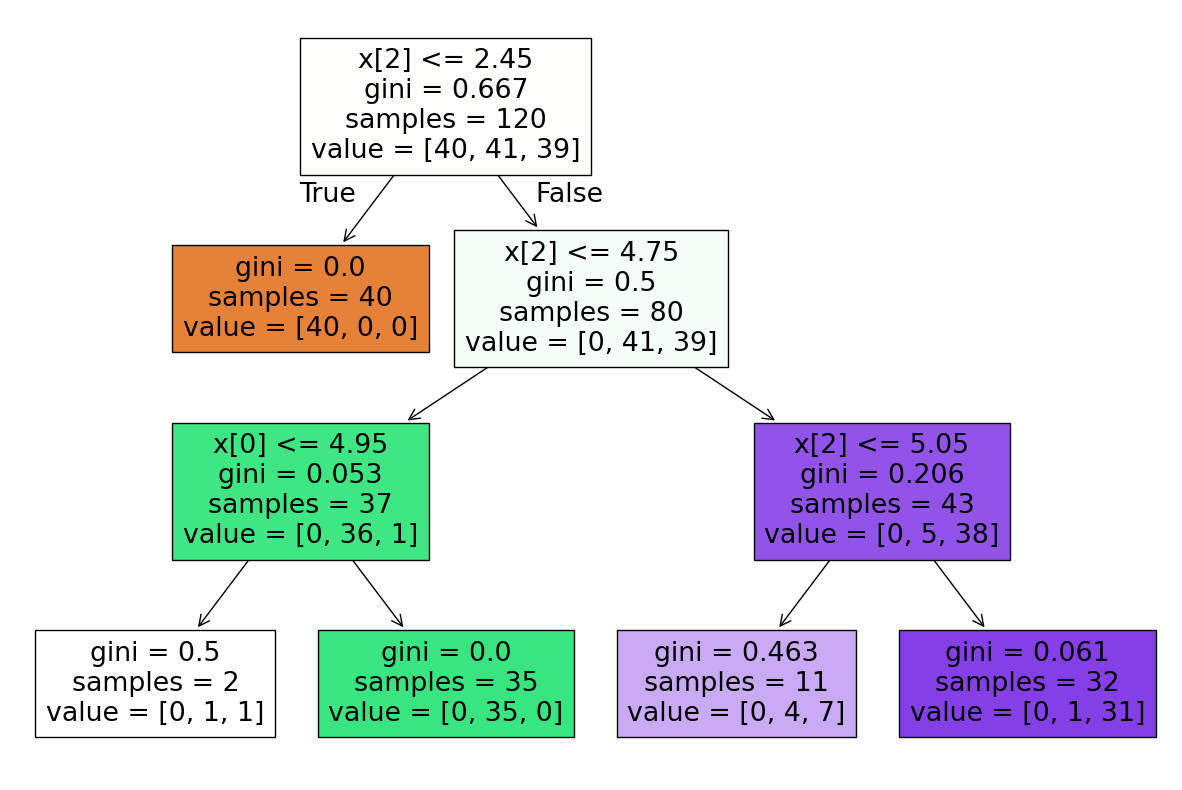

In [68]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model, filled=True)

In [69]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]])

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.45\nentropy = 1.585\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[2] <= 4.75\nentropy = 1.0\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.179\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.519\nsamples = 43\nvalue = [0, 5, 38]')]

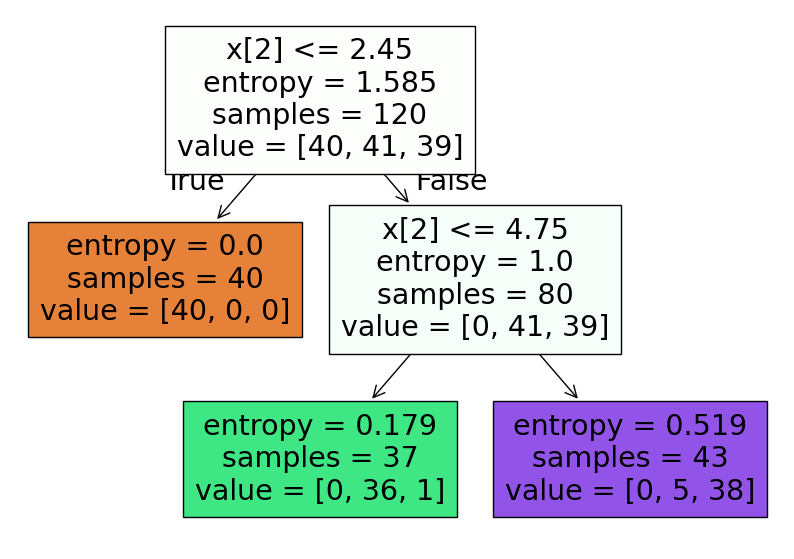

In [70]:
from sklearn import tree
plt.figure(figsize=(10,7))
tree.plot_tree(model_entropy, filled=True)

In [2]:
from sklearn.datasets import load_diabetes
data = load_diabetes()

In [3]:
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [5]:
print(data["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [33]:
import pandas as pd
df_diabetes = pd.DataFrame(data["data"], columns=data["feature_names"])
df_diabetes["target"] = data["target"]
df_diabetes

age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  target  
0   -0.002592  0.019907 -0.017646   151.0  
1   -0.039493 -0.068332 -0.092204    75.0  
2   -0.002592  0.002861 -0.025930   141.0  
3    0.034309  0.022688 -0.009362   206.0  
4   -0.002592 -0.031988 -0.046641   135.0  
..        ...       ...       ...     ...  
437 -0.002592  0.031193  0.007207   178.0  
438  0.034309 -0.018114  0.044485   104.0  
439 -0.011080 -0.046883  0.015491   132.0  
440  0.026560  0.044529 -0.025930   220.0  
441 -0.039493 -0.004222  0.003064    57.0  

[442 rows x 11 columns]

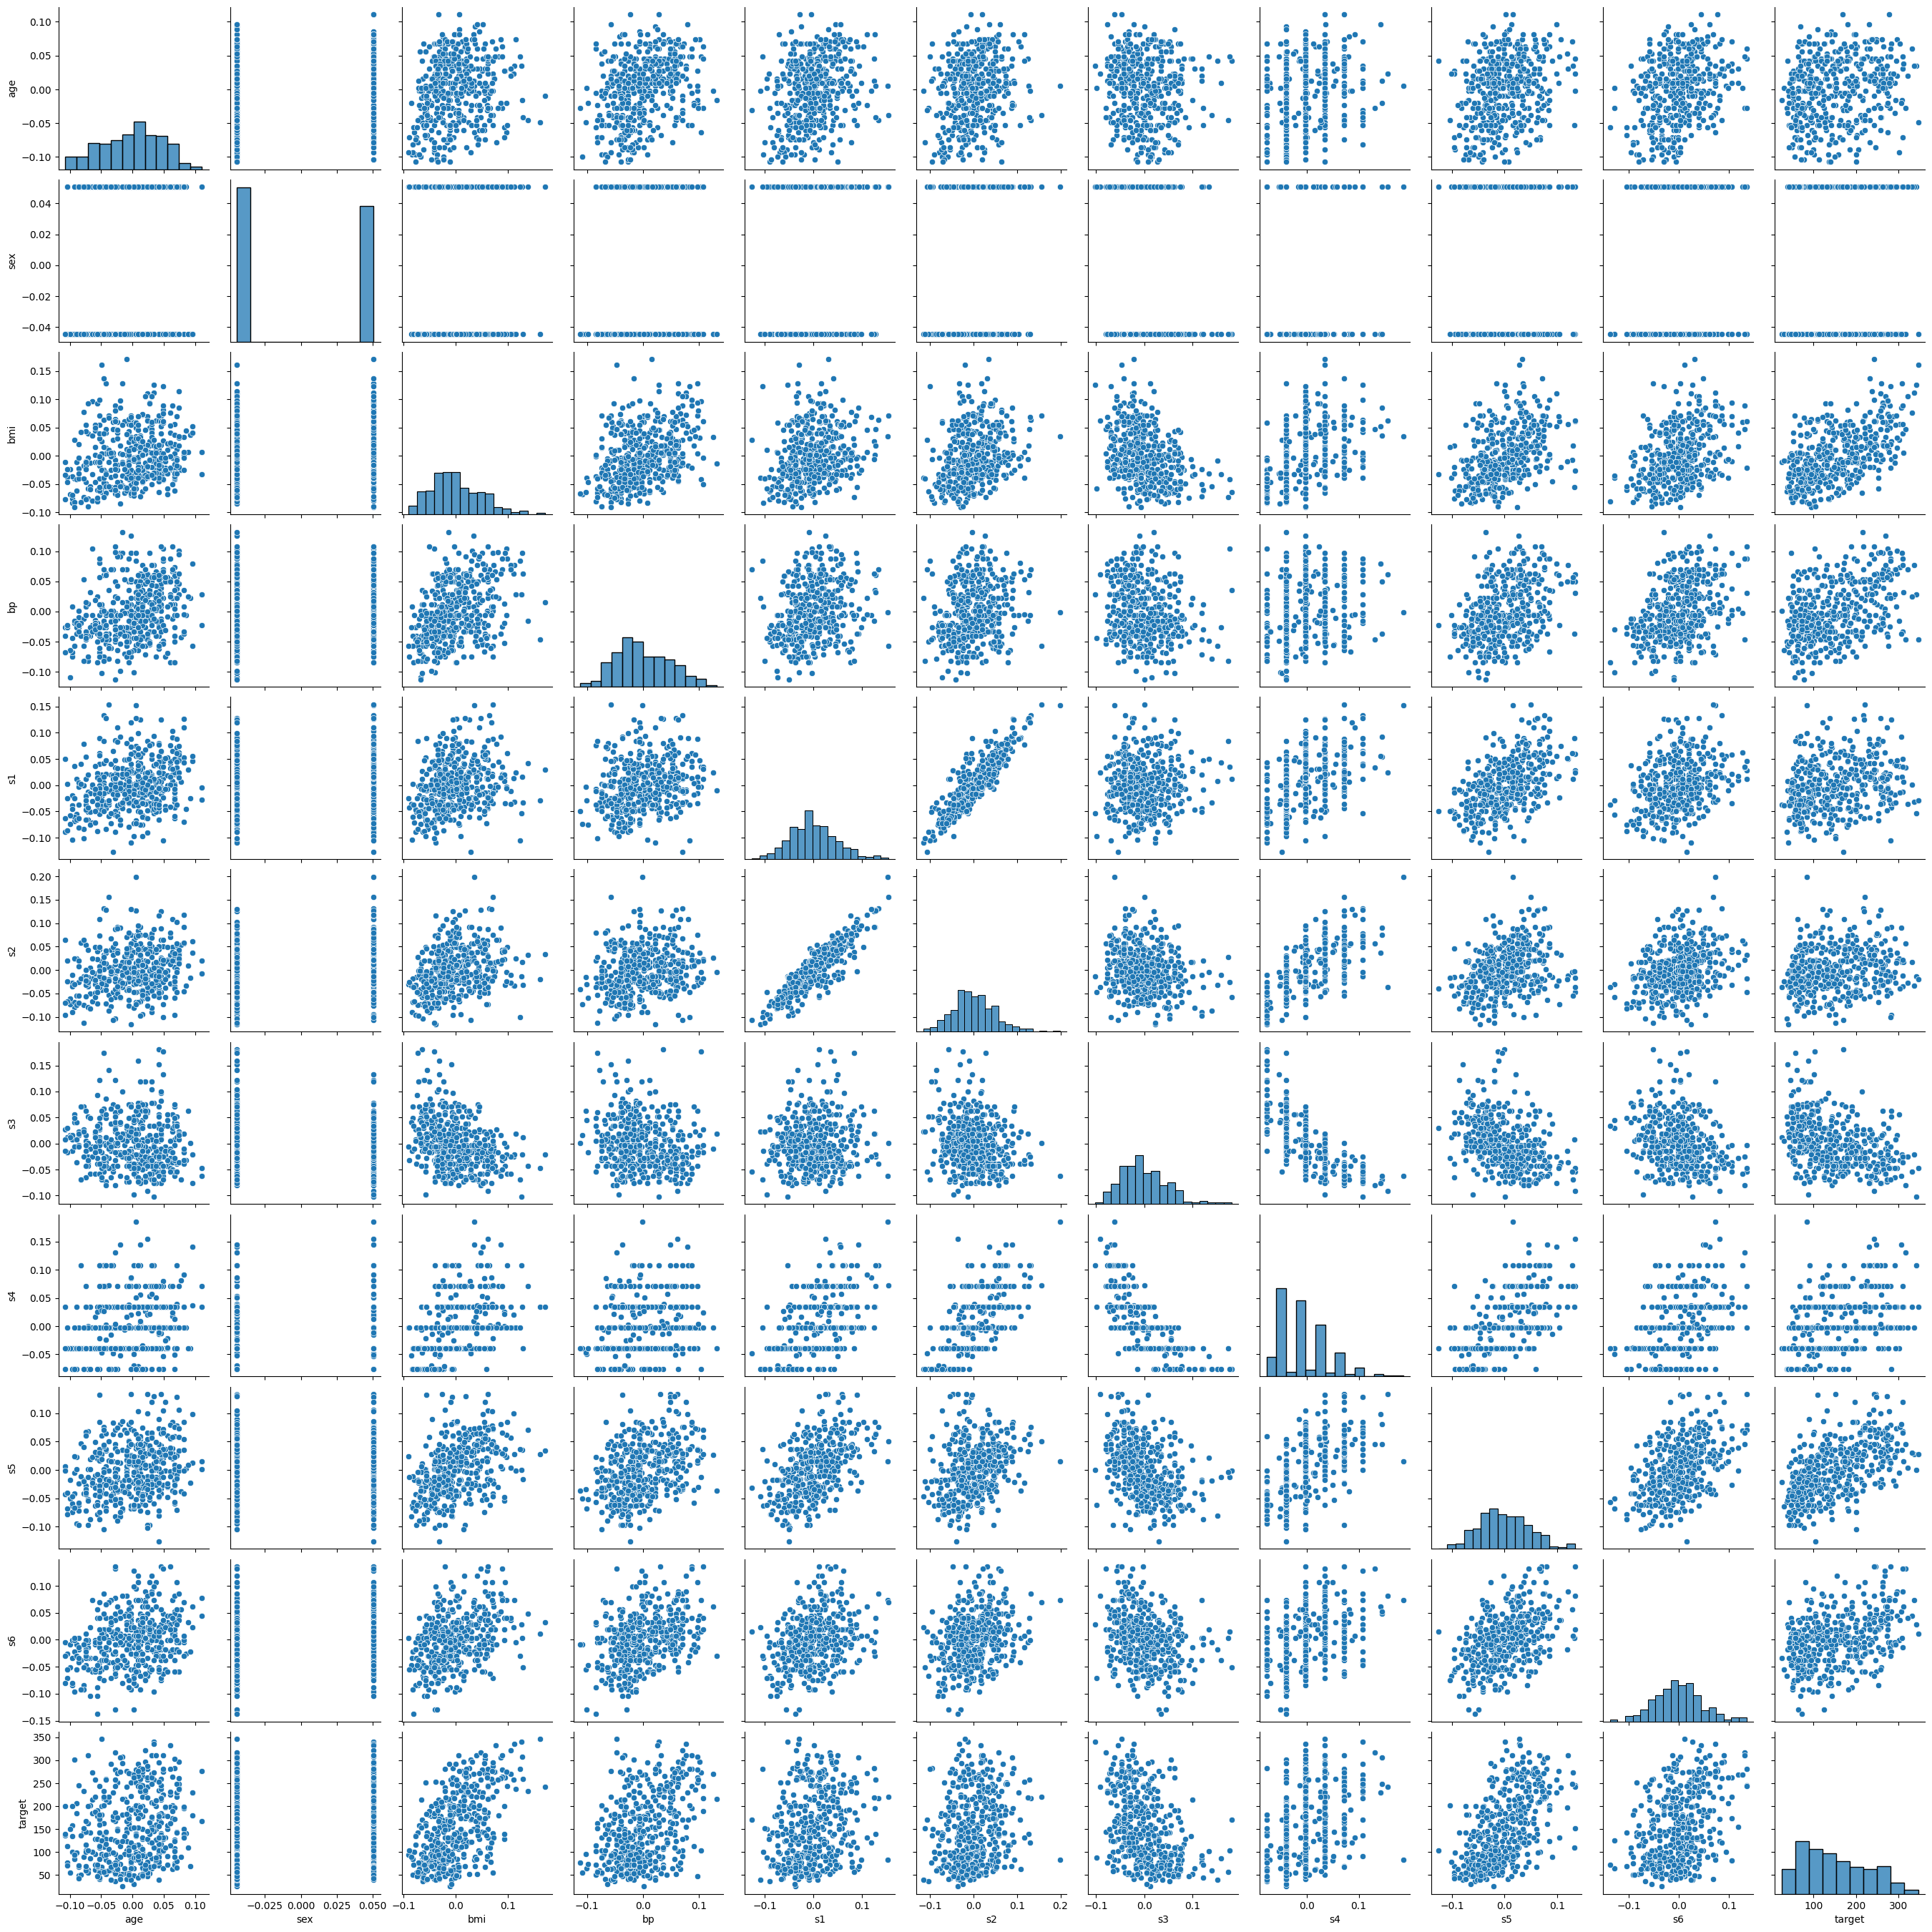

In [34]:
import seaborn as sns
sns.pairplot(df_diabetes)

<Axes: >

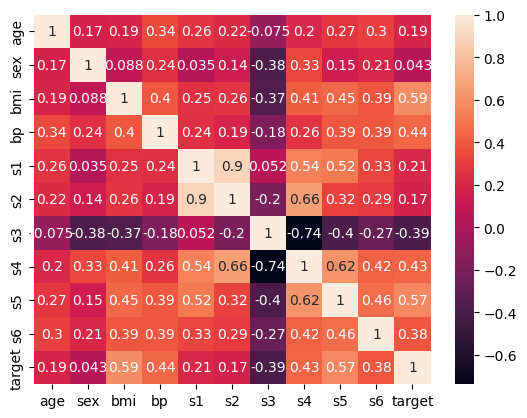

In [38]:
df_diabetes.corr()
sns.heatmap(df_diabetes.corr(), annot=True)

In [39]:
def correlation (dataset, threshold):
    col_corr= set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
              colname = corr_matrix.columns [i]
              col_corr.add(colname)

    return col_corr

In [40]:
df = df_diabetes.drop(correlation(df_diabetes, 0.85), axis =1)
df.shape

(442, 10)

In [41]:
df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's3', 's4', 's5', 's6', 'target'], dtype='object')

In [42]:
X = df.drop("target", axis=1)
y = df["target"]
X.shape, y.shape

((442, 9), (442,))

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)
r2_score(y_test, y_pred)

-0.09009237614909926